## Imports:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
%matplotlib inline

## Load Dataset:

**The following describes the dataset columns:**

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate 10,000 dollor
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in 1000 dollor

In [2]:
name= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv("housing.csv",delim_whitespace=True,names=name)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

# Visualization:

<Axes: >

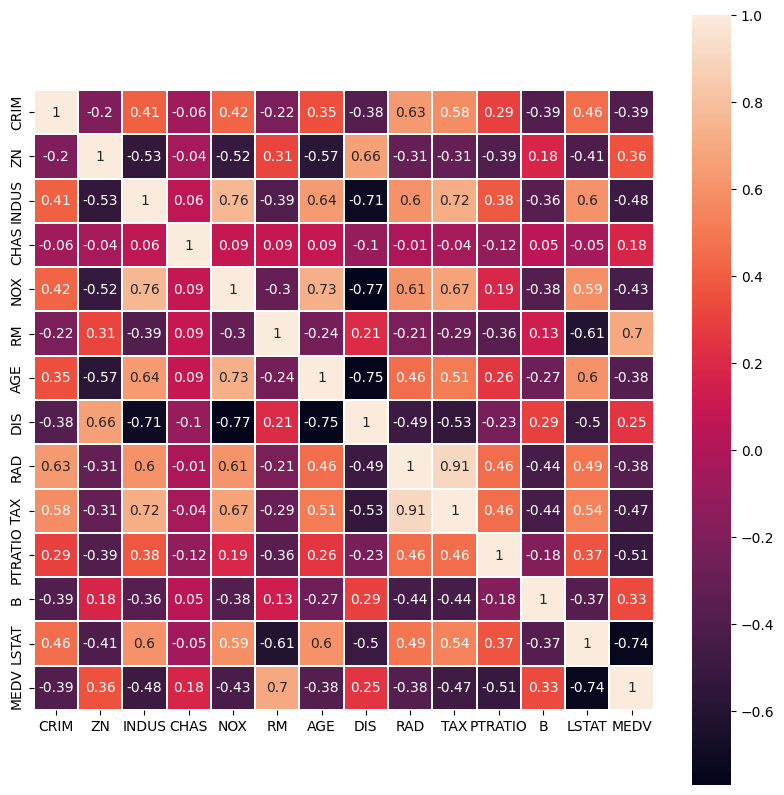

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr().round(2),annot=True,linewidths=0.2,square=True)

# Split Data:

In [7]:
X = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

**Linear Regression on the entire dataset:**

In [9]:
lr = LinearRegression()
# Train the model using the training sets 
lr.fit(X_train, y_train)

LinearRegression()

Training accuracy:

In [10]:
y_pred = lr.predict(X_train)
# Model Evaluation
print('R2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R2: 0.7438615728779137
MAE: 3.353851018725102
MSE: 22.30767024093326
RMSE: 4.72309964334157


Testing accuracy:

In [11]:
y_test_pred = lr.predict(X_test)
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R2:', acc_linreg)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2: 0.7158974770232756
MAE: 3.051810686429814
MSE: 20.767949043693708
RMSE: 4.557186527200056


**Random forest on the entire dataset:**

In [12]:
RF = RandomForestRegressor()
# Train the model using the training sets 
RF.fit(X_train, y_train)

RandomForestRegressor()

Training accuracy:

In [13]:
y_pred = RF.predict(X_train)
# Model Evaluation
print('R2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R2: 0.983783817506422
MAE: 0.821955445544553
MSE: 1.4123037128712856
RMSE: 1.1884038509157087


Testing accuracy:

In [14]:
y_test_pred = RF.predict(X_test)
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R2:', acc_linreg)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2: 0.8352470704178534
MAE: 2.121450980392156
MSE: 12.043470823529418
RMSE: 3.470370415896467


XGboost Regressor:

In [15]:
XG = XGBRegressor(n_estimators=10000, eta=0.1, max_depth=10,learning_rate=0.1)
XG.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

Training accuracy:

In [16]:
y_pred = XG.predict(X_train)
# Model Evaluation
print('R2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R2: 0.9999999860348078
MAE: 0.0007134154291436651
MSE: 1.2162599163689444e-06
RMSE: 0.0011028417458406915


Testing accuracy:


In [17]:
y_test_pred = XG.predict(X_test)
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R2:', acc_linreg)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2: 0.842200767583236
MAE: 1.9082562614889707
MSE: 11.535154224004627
RMSE: 3.396344244037201


### Taking only the high correlated features with the MEDV:

In [18]:
df_high_correlated_features = df[['RM','PTRATIO','LSTAT','MEDV']]
df_high_correlated_features.head()

,RM,PTRATIO,LSTAT,MEDV
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


## Pre-processing:

## MEDV:

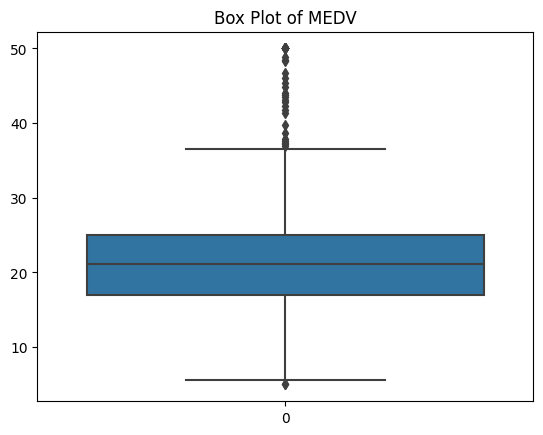

In [19]:
#Box plot for MEDV
sns.boxplot(df_high_correlated_features.MEDV)
plt.title('Box Plot of MEDV')
plt.show()

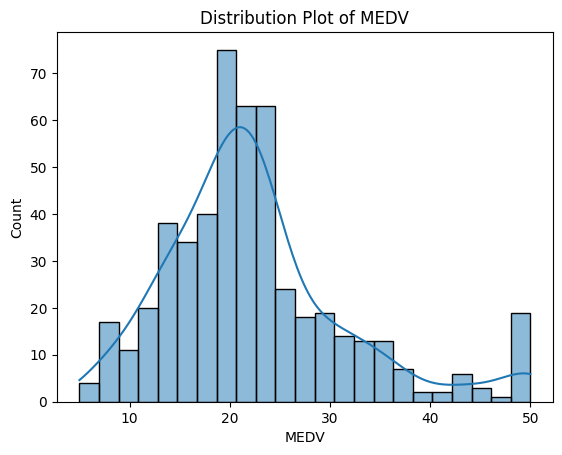

In [20]:
#Distribution Plot for Dependent variable MEDV
sns.histplot(df_high_correlated_features.MEDV, kde=True)
plt.title('Distribution Plot of MEDV')
plt.show()

## RM:

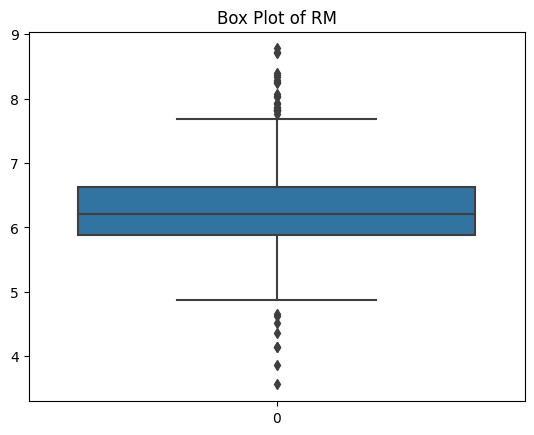

In [21]:
#Box Plot for RM
sns.boxplot(df_high_correlated_features.RM)
plt.title('Box Plot of RM')
plt.show()

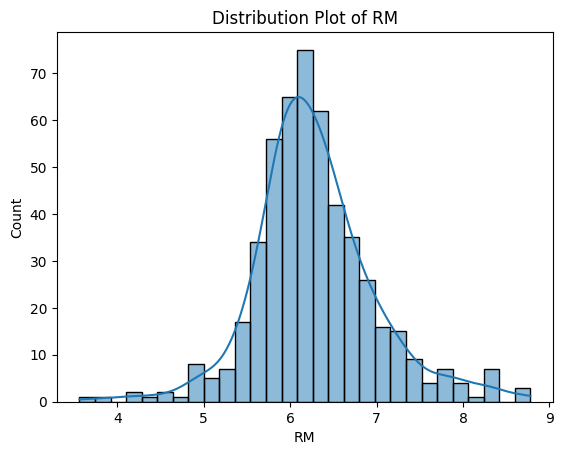

In [22]:
#Distribution Plot for RM
sns.histplot(df_high_correlated_features.RM, kde=True)
plt.title('Distribution Plot of RM')
plt.show()

## PTRATIO:

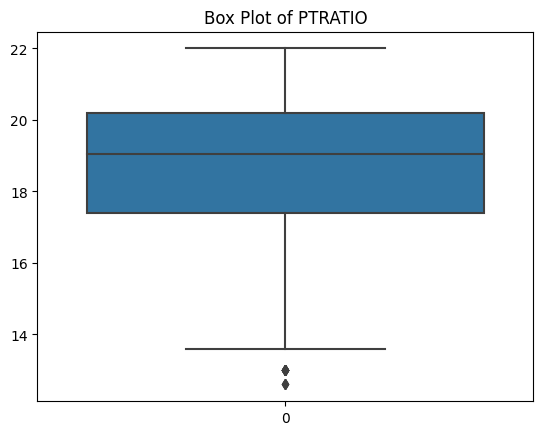

In [23]:
#Box Plot for  PTRATIO
sns.boxplot(df_high_correlated_features.PTRATIO)
plt.title('Box Plot of PTRATIO')
plt.show()

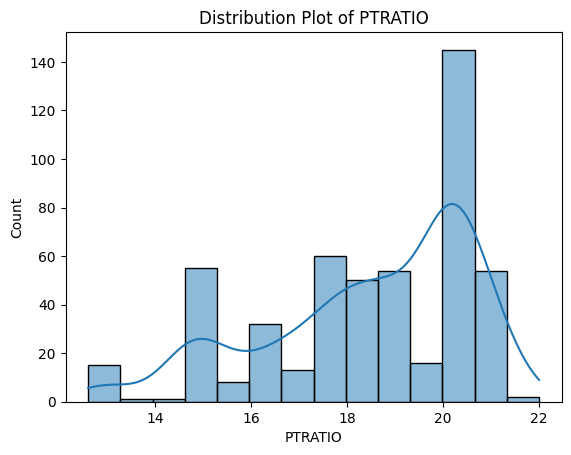

In [24]:
#Distribution Plot for  PTRATIO
sns.histplot(df_high_correlated_features.PTRATIO, kde=True)
plt.title('Distribution Plot of PTRATIO')
plt.show()

## LSTAT:

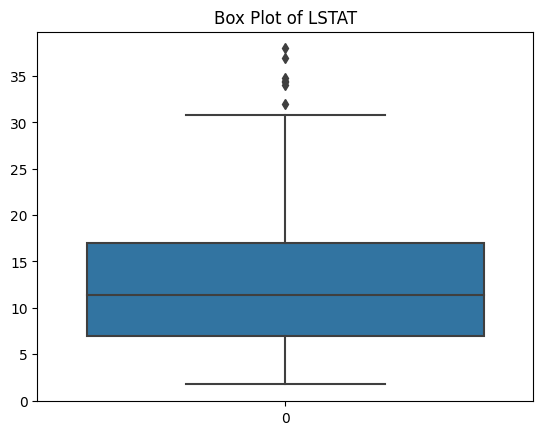

In [25]:
#Box Plot for LSTAT
sns.boxplot(df_high_correlated_features.LSTAT)
plt.title('Box Plot of LSTAT')
plt.show()

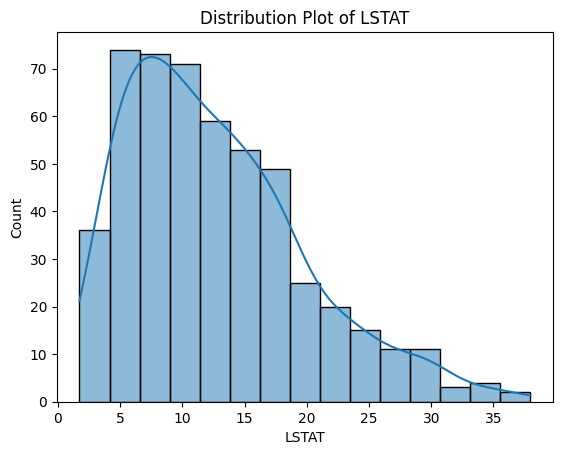

In [26]:
#Distribution Plot for LSTAT
sns.histplot(df_high_correlated_features.LSTAT, kde=True)
plt.title('Distribution Plot of LSTAT')
plt.show()

In [27]:
# Methods to handle the skewness of the data 
#log transformation: transform skewed distribution to a normal distribution.
for feature in ["LSTAT"]:
    df_high_correlated_features[feature] = np.log(1+df_high_correlated_features[feature])

<ipython-input-27-5bf5398535de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_correlated_features[feature] = np.log(1+df_high_correlated_features[feature])


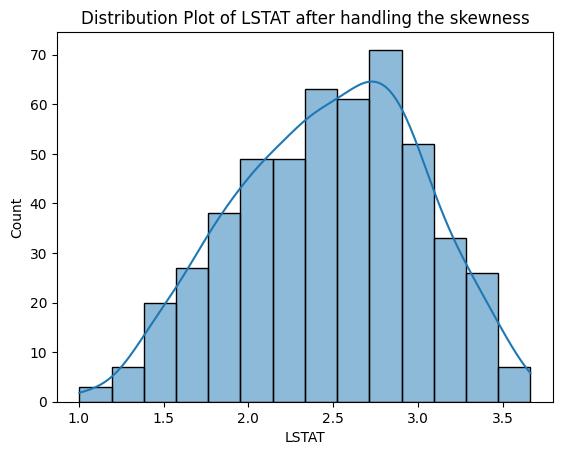

In [28]:
#Distribution Plot for LSTAT
sns.histplot(df_high_correlated_features.LSTAT, kde=True)
plt.title('Distribution Plot of LSTAT after handling the skewness')
plt.show()

In [29]:
#Removing outliers from the dataset
out_col= ['MEDV','RM','LSTAT']
if (set(out_col).issubset(df_high_correlated_features.columns)):
            # 25% quantile
            Q1 = df_high_correlated_features[out_col].quantile(.25)
            # 75% quantile
            Q3 = df_high_correlated_features[out_col].quantile(.75)
            IQR = Q3 - Q1
            # keep the data within 3 IQR
            df_high_correlated_features = df_high_correlated_features[~((df_high_correlated_features[out_col] < (Q1 - 3 * IQR)) |(df_high_correlated_features[out_col] > (Q3 + 3 * IQR))).any(axis=1)]

# Model:

Training the model on the selected features only

In [30]:
X_new = df_high_correlated_features.drop(['MEDV'], axis = 1)
y_new = df_high_correlated_features['MEDV']

In [31]:
#Applying standard scaler on the 3 features
for i in X_new:    
    # fit on training data column
    scale = StandardScaler().fit(X_new[[i]])
    # transform the training data column
    X_new[i] = scale.transform(X_new[[i]])

In [32]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y, test_size = 0.2)

Linear Regression on specific features:

In [33]:
lr_1 = LinearRegression()
lr_1.fit(X_train_1, y_train_1)

LinearRegression()

Training accuracy:

In [34]:
y_pred_1 = lr_1.predict(X_train_1)
print('R2:',metrics.r2_score(y_train_1, y_pred_1))
print('MAE:',metrics.mean_absolute_error(y_train_1, y_pred_1))
print('MSE:',metrics.mean_squared_error(y_train_1, y_pred_1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_1)))

R2: 0.7482996889528861
MAE: 3.1425259349903705
MSE: 20.271197462660048
RMSE: 4.502354657583079


Testing accuracy:

In [35]:
y_test_pred_1 = lr_1.predict(X_test_1)
acc_lr=metrics.r2_score(y_test_1, y_test_pred_1)
print('R2:', acc_lr)
print('MAE:',metrics.mean_absolute_error(y_test_1, y_test_pred_1))
print('MSE:',metrics.mean_squared_error(y_test_1, y_test_pred_1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_1, y_test_pred_1)))

R2: 0.7042500423774125
MAE: 3.757029562837117
MSE: 29.21728840578611
RMSE: 5.405301879246534


Random Forest on specific features:

In [36]:
RF_1 = RandomForestRegressor(n_estimators = 1000, max_depth = 15)
RF_1.fit(X_train_1, y_train_1)

RandomForestRegressor(max_depth=15, n_estimators=1000)

Training accuracy:

In [37]:
y_pred_1 = RF_1.predict(X_train_1)
print('R2:',metrics.r2_score(y_train_1, y_pred_1))
print('MAE:',metrics.mean_absolute_error(y_train_1, y_pred_1))
print('MSE:',metrics.mean_squared_error(y_train_1, y_pred_1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_1)))

R2: 0.9803735436778138
MAE: 0.8399106125064923
MSE: 1.580656654511796
RMSE: 1.2572416850040393


Testing accuracy:

In [38]:
y_test_pred_1 = RF_1.predict(X_test_1)
acc_rf= metrics.r2_score(y_test_1, y_test_pred_1)
print('R2:',acc_rf )
print('MAE:',metrics.mean_absolute_error(y_test_1, y_test_pred_1))
print('MSE:',metrics.mean_squared_error(y_test_1, y_test_pred_1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_1, y_test_pred_1)))

R2: 0.8883069079689672
MAE: 2.2047991940346505
MSE: 11.034217245667875
RMSE: 3.3217792289175203


XGboost Regressor:

In [39]:
XG_1 = XGBRegressor(n_estimators=10000, eta=0.1, max_depth=10,learning_rate=0.1)
XG_1.fit(X_train_1, y_train_1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

Training accuracy:

In [40]:
y_pred_1 = XG_1.predict(X_train_1)
print('R2:',metrics.r2_score(y_train_1, y_pred_1))
print('MAE:',metrics.mean_absolute_error(y_train_1, y_pred_1))
print('MSE:',metrics.mean_squared_error(y_train_1, y_pred_1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_1)))

R2: 0.9999999832574574
MAE: 0.0007693252941170817
MSE: 1.3483947839740274e-06
RMSE: 0.0011612040234058904


Testing accuracy:

In [41]:
y_test_pred_1 = XG_1.predict(X_test_1)
acc_xg= metrics.r2_score(y_test_1, y_test_pred_1)
print('R2:',acc_xg)
print('MAE:',metrics.mean_absolute_error(y_test_1, y_test_pred_1))
print('MSE:',metrics.mean_squared_error(y_test_1, y_test_pred_1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_1, y_test_pred_1)))

R2: 0.9040955615802031
MAE: 2.164192277309941
MSE: 9.474448142717693
RMSE: 3.0780591519198737


In [42]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_lr*100, acc_rf*100, acc_xg*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,90.409556
1,Random Forest,88.830691
0,Linear Regression,70.425004
